<a href="https://colab.research.google.com/github/peddlem25/CreditCardFraudDetection/blob/master/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FRAUD DETECTION

Our Tasks:
  
  - Explore the datasets/ Visualize
  - Decide which features are important
  - Preform Machine Learning
  - Test the model on the testing set
  ***Credit card Data is comign from a Kaggle Dataset and uploaded to google drive named 'creditcard.csv'
  
  If Class-in-balance in datasets use the clustering method.
  

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random


In [34]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,121419.0,-0.036686,0.193040,-0.958560,-0.218194,1.444284,-2.054106,0.643573,-0.304380,0.224345,-0.926227,-0.750701,-0.331058,-0.401203,-0.780216,0.218156,0.226374,0.271579,0.779189,-0.773048,-0.075559,0.495379,1.379136,0.216540,-0.041719,-1.628556,-0.469604,0.352817,0.397244,10.00,0
1,25043.0,-0.292946,1.161832,1.620346,0.240350,0.416745,-0.929579,0.832536,-0.424254,0.887736,-0.692000,0.997581,-2.122614,2.766421,0.594282,0.076387,0.221098,0.577954,-0.016219,-0.294503,0.224500,-0.449076,-0.769967,-0.044330,0.296015,-0.171962,0.001767,0.059937,-0.127592,1.98,0
2,125675.0,1.999879,0.177177,-1.706486,1.199386,0.664725,-0.628534,0.559776,-0.268718,-0.078450,0.416979,0.480513,1.054039,-0.008744,0.655918,-1.225316,-0.459749,-0.512698,-0.091516,0.186255,-0.252391,0.086166,0.446736,-0.062454,-0.382035,0.479541,-0.488012,-0.017971,-0.074097,13.37,0
3,55957.0,1.109542,-0.751904,1.499266,0.513533,-1.582488,0.416214,-1.357137,0.410273,-0.522522,0.947178,1.189435,0.119435,-0.717576,0.143172,1.049982,-0.800039,-0.359172,2.058270,-1.752918,-0.549262,-0.011610,0.371222,0.043044,0.158878,0.073060,-0.236623,0.101340,0.039847,39.00,0
4,54316.0,-0.411092,-0.624778,1.917760,-0.741463,-0.215804,-0.085823,-0.404073,0.017429,-1.083655,0.664736,1.172230,0.545921,0.045961,-0.368393,-0.576436,-2.548667,0.851481,0.813834,0.736662,-0.138582,-0.298585,-0.099074,0.022514,0.304570,-0.703445,1.505096,-0.087354,-0.098987,3.90,0


Show how many Fraud and Non Fraud cases their are

In [35]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


Visualize the *Fraud* VS the *Non Fraud* cases in dollar based transaction sizes.


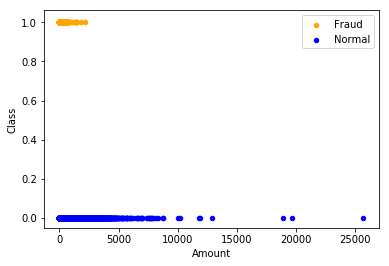

In [37]:
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()


As we can see most if not all Fraud cases are in the amounts less than $5000.

#Machine Learning Time :)

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

Train 35%/ Test 65%

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.35)

1e5 = 100,000. C is a penalty term, used to disincentivize and regulate against over fig.

In [48]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, Y_train)
print('Score;', logistic.score(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score; 0.9989767563175266


Score is 0.9989%

In [49]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]


Most is not fraud